In [1]:
#Cargar las librerias necesarias
import matplotlib.pyplot as plt
from sklearn import linear_model
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("C:/Users/pipeg/Desktop/U/S6/Analisis de Datos/Etapa 2/framingham.csv", sep = ",")

In [3]:
data

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


array([[<Axes: title={'center': 'male'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'education'}>,
        <Axes: title={'center': 'currentSmoker'}>],
       [<Axes: title={'center': 'cigsPerDay'}>,
        <Axes: title={'center': 'BPMeds'}>,
        <Axes: title={'center': 'prevalentStroke'}>,
        <Axes: title={'center': 'prevalentHyp'}>],
       [<Axes: title={'center': 'diabetes'}>,
        <Axes: title={'center': 'totChol'}>,
        <Axes: title={'center': 'sysBP'}>,
        <Axes: title={'center': 'diaBP'}>],
       [<Axes: title={'center': 'BMI'}>,
        <Axes: title={'center': 'heartRate'}>,
        <Axes: title={'center': 'glucose'}>,
        <Axes: title={'center': 'TenYearCHD'}>]], dtype=object)

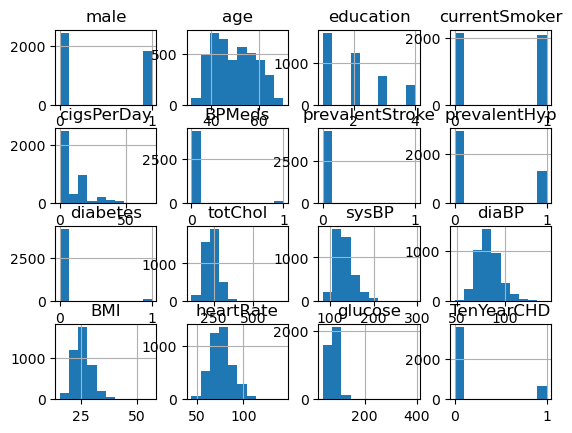

In [25]:
data.hist()

In [33]:
frecuencia_corazonfumador = data.groupby(["heartRate"]).count()["currentSmoker"]

In [34]:
frecuencia_corazonfumador

heartRate
44.0     1
45.0     2
46.0     1
47.0     1
48.0     5
        ..
122.0    2
125.0    3
130.0    1
140.0    1
143.0    1
Name: currentSmoker, Length: 73, dtype: int64

Text(0, 0.5, 'cantidad de fumadores frecuente')

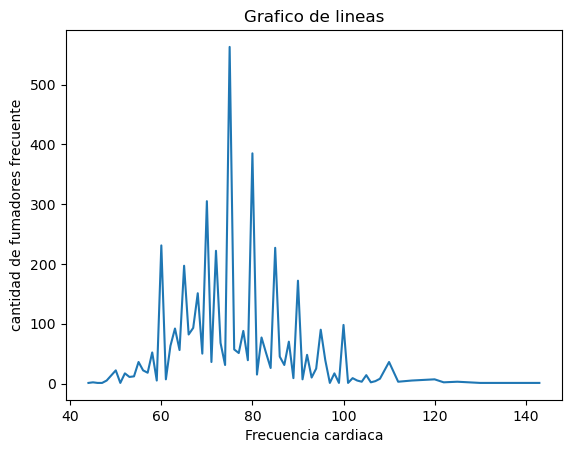

In [35]:
plt.plot(frecuencia_corazonfumador)
plt.title("Grafico de lineas")
plt.xlabel("Frecuencia cardiaca")
plt.ylabel("cantidad de fumadores frecuente")

In [26]:
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


<Axes: xlabel='heartRate', ylabel='currentSmoker'>

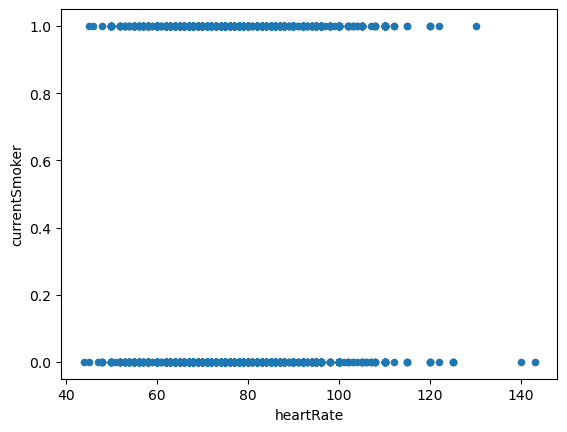

In [38]:
data[["heartRate","currentSmoker"]].plot.scatter(x="heartRate", y="currentSmoker")

In [191]:
w=0.0822
b=-6.304

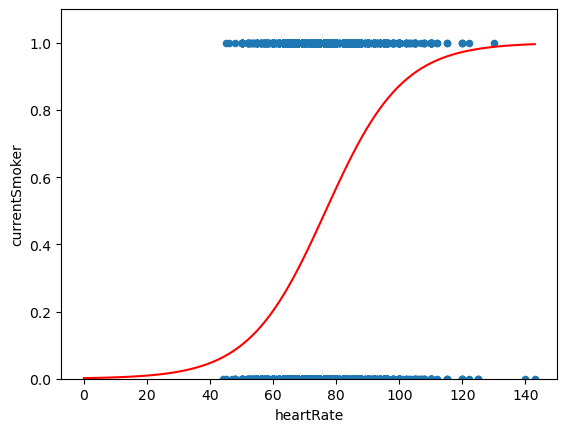

In [192]:
x = np.linspace(0,data['heartRate'].max(),100)
y = 1/(1+np.exp(-(w*x+b)))

# grafica de la recta
data.plot.scatter(x='heartRate',y='currentSmoker')
plt.plot(x, y, '-r')
plt.ylim(0,data['currentSmoker'].max()*1.1)
# plt.grid()
plt.show()

In [50]:
def delta_j_w(w, b):
    data['sigmoid'] = 1/(1+np.exp(-(data['heartRate']*w+b)))
    data['partial_loss'] = (data['sigmoid']-data['currentSmoker'])*data['BMI']
    derivative = data['partial_loss'].mean()
    return(derivative) 

def delta_j_b(w, b):
    data['sigmoid'] = 1/(1+np.exp(-(data['heartRate']*w+b)))
    data['partial_loss'] = (data['sigmoid']-data['currentSmoker'])
    derivative = data['partial_loss'].mean()
    return(derivative) 

In [ ]:
x = np.linspace(0,train['BMI'].max(),100)
y = 1/(1+np.exp(-(w*x+b)))

# grafica de la recta
train.plot.scatter(x='BMI',y='Outcome')
plt.plot(x, y, '-r')
plt.ylim(0,train['Outcome'].max()*1.1)
# plt.grid()
plt.show()

In [87]:
w_0= 0.30336
b_0 = -5.56

In [190]:
alpha_w = 0.001
alpha_b = 0.1

w_new = w_0 - alpha_w * delta_j_w(w_0, b_0)
b_new = b_0 - alpha_b * delta_j_b(w_0, b_0)

w_0 = w_new
b_0 = b_new

print(w_0, b_0)

0.08220372044870285 -6.30482672264302
